<strong> Football Data import using free API from football_data.org </strong>
<br>
<br>
[(https://rapidapi.com/Creativesdev/api/free-api-live-football-data/playground/apiendpoint_4c79d258-7ac0-4e0d-90e1-aa7f76cf1dd9)]
<br>
<br>
max calls 100 per day, import all data

<strong><span style="color:Red"> imports

In [1]:
print("importing libraries")
from datetime import datetime
print(f"start time {datetime.now()}")
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import urllib
import requests
import matplotlib.pyplot as plt
import pytz
print("imports complete")

importing libraries
start time 2025-02-11 13:06:55.032846
imports complete


<strong><span style="color:green"> keys and connections

write API results to SQL DB

In [2]:
#free rapid API
api_key = 'a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4'

In [11]:
url = "https://free-api-live-football-data.p.rapidapi.com/football-get-all-matches-by-league"

querystring = {'leagueid':'47'}

headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": 'free-api-live-football-data.p.rapidapi.com'
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    response = response.json()
    matches = response.get("response", {}).get("matches", [])
    
    print(response)

    fixture_data = []

    for match in matches:
        match_id = match.get('id')
        home_team = match.get('home', {}).get('name')
        away_team = match.get('away', {}).get('name')
        fixture_time = match.get('status', {}).get('utcTime')
        
        fixture_data.append({
            "match_id": match_id,
            "home_team": home_team,
            "away_team": away_team,
            "fixture_time": fixture_time
        })

    df_fixture_data = pd.DataFrame(fixture_data)
    print(df_fixture_data.head())
else:
    print(f"Failed to retrieve data: {response.status_code} - {response.text}")


{'status': 'failed', 'message': 'Request Failed Please try Again'}
Empty DataFrame
Columns: []
Index: []


git hub game week (GW) combined data pull and combination of seasons

In [ ]:
print("collecting 2022-23 data")

url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df_2022_23_gw_data = pd.read_csv(url,on_bad_lines='warn')

print("collecting 2023-24 data")

url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df_2023_24_gw_data = pd.read_csv(url,on_bad_lines='warn')
#print(df_2023_24_gw_data)

print("collecting 2024-25 data")

url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2024-25/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df_2024_25_gw_data = pd.read_csv(url,on_bad_lines='warn')
#print(df_2024_25_gw_data)

df_2022_23_gw_data['game_year'] = '2022-23'
print(df_2022_23_gw_data.columns)

df_2023_24_gw_data['game_year'] = '2023-24'
print(df_2023_24_gw_data.columns)

df_2024_25_gw_data['game_year'] = '2024-25'
print(df_2024_25_gw_data.columns)
#combine seasons for continutiy between years
df_gameweeks = pd.concat([df_2022_23_gw_data,df_2023_24_gw_data,df_2024_25_gw_data]).drop_duplicates().reset_index(drop=True)
print(df_gameweeks.columns)

collecting 2022-23 data
collecting 2023-24 data
collecting 2024-25 data


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\1832466412.py:21: ParserWarning: Skipping line 14180: expected 42 fields, saw 49
Skipping line 14181: expected 42 fields, saw 49
Skipping line 14182: expected 42 fields, saw 49
Skipping line 14183: expected 42 fields, saw 49
Skipping line 14184: expected 42 fields, saw 49
Skipping line 14185: expected 42 fields, saw 49
Skipping line 14186: expected 42 fields, saw 49
Skipping line 14187: expected 42 fields, saw 49
Skipping line 14188: expected 42 fields, saw 49
Skipping line 14189: expected 42 fields, saw 49
Skipping line 14190: expected 42 fields, saw 49
Skipping line 14191: expected 42 fields, saw 49
Skipping line 14192: expected 42 fields, saw 49
Skipping line 14193: expected 42 fields, saw 49
Skipping line 14194: expected 42 fields, saw 49
Skipping line 14195: expected 42 fields, saw 49
Skipping line 14196: expected 42 fields, saw 49
Skipping line 14197: expected 42 fields, saw 49
Skipping line 14198: expected 42 fields, saw 49
Skipp

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW',
       'game_year'],
      dtype='object')
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'mi

FPL scoing function and application

In [ ]:
def scoring_mechanism (minutes, goals_scored, assists ,position, saves, penalties_saved, penalties_missed, clean_sheets ,goals_conceded, yellow_cards, red_cards, own_goals):

    score = 0

#time playing rule
    if minutes > 0 and minutes < 60: 
         score += 1
    if minutes >= 60:
        score += 2

#goals scored    
    if position == 'GK':
        score += goals_scored*10
    elif position == 'DEF':
        score += goals_scored*6
    elif position == 'MID':
        score += goals_scored*5
    elif position == 'FWD':
        score += goals_scored*4
    
#goal assists
    score += assists*3

#clean sheets
    if position in {'GK','DEF'} and clean_sheets == 1:
        score += 4
    elif position == 'MID' and clean_sheets == 1:
        score += 1

#goal saves
    if position == 'GK' and saves >=3:
        score += saves*(1/3)

#penalty saves
    score += penalties_saved*5

#penalty miss
    score += penalties_missed*-2

#goals conceeded
    if position in {'GK','DEF'} and goals_conceded >= 2:
        score += goals_conceded*(1/2)

#yellow cards
    score += yellow_cards*-1

#red cards    
    score += red_cards*-3

#own goals
    score += own_goals

#calc total score    
    return score

print("scoring_mechanism ready")

scoring_mechanism ready


<strong> Result classification

In [ ]:

def result_classification (team_a_score, team_h_score):

    if team_a_score > team_h_score:
        result = "Away Win"
    elif team_h_score > team_a_score:
        result = "Home Win"
    elif team_a_score == team_h_score:
        result = "Draw"
    
    return result

print("result_classification ready")

result_classification ready


<strong>Points in current season

In [ ]:
def championship_points_from_match(team, result, away_team, home_team):
    points = 0
    if team == away_team:
        if result == "Away Win":
            points += 3
        elif result == "Draw":
            points += 1
    elif team == home_team:
        if result == "Home Win":
            points += 3
        elif result == "Draw":
            points += 1
    
    return points
print("championship points from match ready")


championship points from match ready


In [ ]:
def future_game (kickoff_time):
    now = datetime.now()
    now_less_7 = now - pd.DateOffset(days=7)
    now_less_7 = now_less_7.replace(tzinfo=pytz.utc)
    kickoff_time = pd.to_datetime(kickoff_time, utc=True)

    if kickoff_time > now_less_7:
        return True
    else:
        return False

In [ ]:
# Define the required columns as a set (no need for a list of sets)
required_columns_scoring_mechanism = {
    "minutes", "goals_scored", "assists", "position", "saves",
    "penalties_saved", "penalties_missed", "clean_sheets", "goals_conceded",
    "yellow_cards", "red_cards", "own_goals"}


# Check for missing columns in the DataFrame
missing_columns = [col for col in required_columns_scoring_mechanism if col not in df_gameweeks.columns]

# Print missing columns or proceed
# Ensure all required columns are present
missing_columns = [col for col in required_columns_scoring_mechanism if col not in df_gameweeks.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Apply the function, passing the required columns explicitly
    df_gameweeks["fpl_score"] = df_gameweeks.apply(
        lambda row: scoring_mechanism(
            row["minutes"],
            row["goals_scored"],
            row["assists"],
            row["position"],
            row["saves"],
            row["penalties_saved"],
            row["penalties_missed"],
            row["clean_sheets"],
            row["goals_conceded"],
            row["yellow_cards"],
            row["red_cards"],
            row["own_goals"]
        ),
        axis=1
    )
    print(df_gameweeks.columns)

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW', 'game_year',
       'modified', 'fpl_score'],
      dtype='object')


define fixtures

In [ ]:
columns_to_keep_events = ["team", "fixture", "kickoff_time", "team_a_score", "team_h_score", "was_home", "game_year"]

df_events = df_gameweeks[columns_to_keep_events]



df_events = df_events.drop_duplicates()

df_events = df_events.sort_values(by=["kickoff_time", "fixture", "was_home"], ascending=(False, True, False))

df_team_stats = df_events.copy()

df_events["home_vs_away"] = df_events.apply(
    lambda row: (
        row["team"] + "-" + (
            df_events["team"].shift(-1).fillna("Unknown")[row.name]
            if row["was_home"] == True
            else df_events["team"].shift(+1).fillna("Unknown")[row.name]
        )
    ),
    axis=1
)


#df_events = df_events[df_events["was_home"] == False]

df_events["away_team"] = df_events["home_vs_away"].str.split("-").str[0]
df_events["home_team"] = df_events["home_vs_away"].str.split("-").str[1]

df_events["result"] = df_events.apply(lambda row: result_classification(
    row["team_a_score"],
    row["team_h_score"]
), axis=1)

df_events["points_from_game"] = df_events.apply(
    lambda row: championship_points_from_match(
        row["team"],
        row["result"],
        row["away_team"],
        row["home_team"]
    ),
    axis=1
)

df_events["home_vs_away_points"] = df_events.apply(
    lambda row: (
        str(df_events["points_from_game"][row.name]) + "-" + (
            str(df_events["points_from_game"].shift(-1).fillna("Unknown")[row.name])
            if row["was_home"] == True
            else str(df_events["points_from_game"].shift(+1).fillna("Unknown")[row.name])
        )
    ),
    axis=1
)

df_events["points_from_last_game_away"] = df_events["home_vs_away_points"].str.split("-").str[0]
df_events["points_from_last_game_home"] = df_events["home_vs_away_points"].str.split("-").str[1]

df_events = df_events.drop(columns=["home_vs_away", "team", "home_vs_away_points","points_from_game"])

print(df_events.dtypes)

df_events["points_from_last_game_away"] = df_events["points_from_last_game_away"].astype(float)
df_events["points_from_last_game_home"] = df_events["points_from_last_game_home"].astype(float)

print(df_events.dtypes)

fixture                        int64
kickoff_time                  object
team_a_score                   int64
team_h_score                   int64
was_home                        bool
game_year                     object
away_team                     object
home_team                     object
result                        object
points_from_last_game_away    object
points_from_last_game_home    object
dtype: object
fixture                         int64
kickoff_time                   object
team_a_score                    int64
team_h_score                    int64
was_home                         bool
game_year                      object
away_team                      object
home_team                      object
result                         object
points_from_last_game_away    float64
points_from_last_game_home    float64
dtype: object


<strong><span style="color:green; font-size:50px;">Game Result type prediction</strong>

In [ ]:
df = df_events  # Replace with your data path
df['kickoff_time'] = pd.to_datetime(df['kickoff_time'], format='ISO8601')
df.sort_values('kickoff_time', inplace=True)

print(df['kickoff_time'].dtype)

df["kickoff_time"] = pd.to_datetime(df["kickoff_time"], utc=True)

df = df.sort_values('kickoff_time')

#make predictions on future games

today = datetime.today()
today_minus_7 = today - pd.DateOffset(days=7)

# Print the computed date for debugging
print("Today:", today)
print("Today minus 7 days:", today_minus_7)

df_fixture_data["fixture_time"] = pd.to_datetime(df_fixture_data["fixture_time"], format='ISO8601', utc=True).dt.tz_localize(None)

# Use today_minus_7 directly without converting it
df_future_games = df_fixture_data[df_fixture_data["fixture_time"] > today_minus_7]

print(df_future_games)

df_future_games = df_future_games[['home_team', 'away_team', 'fixture_time']]

print(df.columns)

df_future_games = df_future_games.rename(columns={'fixture_time': 'kickoff_time'})

df_predict_bet = pd.concat([df, df_future_games])

df_predict_bet["games_in_future"] = df_predict_bet["kickoff_time"].apply(future_game)

df = df_predict_bet

encoder = OrdinalEncoder(dtype=float)

# Factorise the team names
df["team_home_factorised"] = encoder.fit_transform(df[["home_team"]])
df["team_away_factorised"] = encoder.fit_transform(df[["away_team"]])

# goarl scoring form
df['form_score_home_10'] = df.groupby('home_team')['team_h_score'].rolling(10).mean().shift(1).reset_index(0, drop=True)
df['form_score_away_10'] = df.groupby('away_team')['team_a_score'].rolling(10).mean().shift(1).reset_index(0, drop=True)
df['form_score_home_5'] = df.groupby('home_team')['team_h_score'].rolling(5).mean().shift(1).reset_index(0, drop=True)
df['form_score_away_5'] = df.groupby('away_team')['team_a_score'].rolling(5).mean().shift(1).reset_index(0, drop=True)
df['form_score_home_2'] = df.groupby('home_team')['team_h_score'].rolling(2).mean().shift(1).reset_index(0, drop=True)
df['form_score_away_2'] = df.groupby('away_team')['team_a_score'].rolling(2).mean().shift(1).reset_index(0, drop=True)

# goal difference form
df['goal_diff_home'] = df['team_h_score'] - df['team_a_score']
df['goal_diff_away'] = df['team_a_score'] - df['team_h_score']
df["form_gd_away_10"] = df.groupby('away_team')['goal_diff_away'].rolling(10).mean().shift(1).reset_index(0, drop=True)
df["form_gd_home_10"] = df.groupby('home_team')['goal_diff_home'].rolling(10).mean().shift(1).reset_index(0, drop=True)
df["form_gd_away_5"] = df.groupby('away_team')['goal_diff_away'].rolling(5).mean().shift(1).reset_index(0, drop=True)
df["form_gd_home_5"] = df.groupby('home_team')['goal_diff_home'].rolling(5).mean().shift(1).reset_index(0, drop=True)
df["form_gd_away_2"] = df.groupby('away_team')['goal_diff_away'].rolling(2).mean().shift(1).reset_index(0, drop=True)
df["form_gd_home_2"] = df.groupby('home_team')['goal_diff_home'].rolling(2).mean().shift(1).reset_index(0, drop=True)

#previous results
df['prev_result_home'] = df.groupby('home_team')['result'].shift(1)
df['prev_result_away'] = df.groupby('away_team')['result'].shift(1)

#calculate the points for current season
df['points_home'] = df.groupby(['home_team', 'game_year'])['points_from_last_game_home'].cumsum()
df['points_away'] = df.groupby(['away_team', 'game_year'])['points_from_last_game_away'].cumsum()

# Target variable: Win (1), Draw (0), Lose (-1)
df['result_num'] = np.where(df['team_h_score'] > df['team_a_score'], 1,
                        np.where(df['team_h_score'] == df['team_a_score'], 0, -1))

df['prev_result_away'] = df['prev_result_away'].map({'Home Win': 1, 'Draw': 0, 'Away Win': -1})
df['prev_result_home'] = df['prev_result_home'].map({'Home Win': 1, 'Draw': 0, 'Away Win': -1})

print(df.columns)

df_reg = df

df = df[df["games_in_future"] == False] 

max_date = df["kickoff_time"].max()
max_date_minus_30 = max_date - pd.DateOffset(days=60)

# Split features and target
comparison_date = max_date_minus_30

df["kickoff_time"] = pd.to_datetime(df["kickoff_time"], utc=True)

df_train = df[df["kickoff_time"] < comparison_date]
df_test = df[df["kickoff_time"]>comparison_date]

random_state = 42

df_home_vs_away = df.copy()
df_home_vs_away = df_home_vs_away[["home_team", "away_team", "team_h_score", "team_a_score", "result", "kickoff_time", "games_in_future"]]


datetime64[ns, UTC]
Today: 2025-02-10 15:34:18.587757
Today minus 7 days: 2025-02-03 15:34:18.587757
    match_id     home_team  away_team        fixture_time
238  4506616       Chelsea   West Ham 2025-02-03 20:00:00
239  4506436       Everton  Liverpool 2025-02-12 19:30:00
240  4506624      Brighton    Chelsea 2025-02-14 20:00:00
241  4506627     Leicester    Arsenal 2025-02-15 12:30:00
242  4506623   Aston Villa    Ipswich 2025-02-15 15:00:00
..       ...           ...        ...                 ...
375  4506598     Newcastle    Everton 2025-05-25 15:00:00
376  4506599  Nottm Forest    Chelsea 2025-05-25 15:00:00
377  4506600   Southampton    Arsenal 2025-05-25 15:00:00
378  4506601     Tottenham   Brighton 2025-05-25 15:00:00
379  4506602        Wolves  Brentford 2025-05-25 15:00:00

[142 rows x 4 columns]
Index(['fixture', 'kickoff_time', 'team_a_score', 'team_h_score', 'was_home',
       'game_year', 'away_team', 'home_team', 'result',
       'points_from_last_game_away', 'points_

C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2099322851.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["kickoff_time"] = pd.to_datetime(df["kickoff_time"], utc=True)


<strong><span style ="color:green;font-size:25px">team form v2 analysis

In [ ]:
df_team_stats = df_team_stats.sort_values(by=["kickoff_time"], ascending=(True))

df_team_stats["win_loss"] = np.select(
    [
        (df_team_stats["was_home"]) & (df_team_stats["team_h_score"] > df_team_stats["team_a_score"]),
        (~df_team_stats["was_home"]) & (df_team_stats["team_h_score"] < df_team_stats["team_a_score"]),
        (df_team_stats["was_home"]) & (df_team_stats["team_h_score"] < df_team_stats["team_a_score"]),
        (~df_team_stats["was_home"]) & (df_team_stats["team_h_score"] > df_team_stats["team_a_score"]),
        (df_team_stats["team_h_score"] == df_team_stats["team_a_score"]),
    ],
    [1, 1, -1, -1, 0],
    default=0  # Fallback in case none match
)

df_team_stats["goal_diff"] = np.where(df_team_stats["was_home"] == True, df_team_stats["team_h_score"] - df_team_stats["team_a_score"],
                                      df_team_stats["team_a_score"] - df_team_stats["team_h_score"])

df_team_stats["last_2_games_win_raito"] = df_team_stats.groupby("team")["win_loss"].rolling(2).mean().shift(1).reset_index(0, drop=True)
df_team_stats["last_5_games_win_raito"] = df_team_stats.groupby("team")["win_loss"].rolling(5).mean().shift(1).reset_index(0, drop=True)
df_team_stats["last_10_games_win_raito"] = df_team_stats.groupby("team")["win_loss"].rolling(10).mean().shift(1).reset_index(0, drop=True)

df_team_stats["last_2_games_goal_diff"] = df_team_stats.groupby("team")["goal_diff"].rolling(2).mean().shift(1).reset_index(0, drop=True)
df_team_stats["last_5_games_goal_diff"] = df_team_stats.groupby("team")["goal_diff"].rolling(5).mean().shift(1).reset_index(0, drop=True)
df_team_stats["last_10_games_goal_diff"] = df_team_stats.groupby("team")["goal_diff"].rolling(10).mean().shift(1).reset_index(0, drop=True)

df_team_stats["kickoff_time"] = pd.to_datetime(df_team_stats["kickoff_time"], utc=True)

df_home_vs_away = df_home_vs_away.merge(df_team_stats, left_on=["home_team", "kickoff_time"], right_on=["team","kickoff_time"], how="left")
print(f"1{df_home_vs_away.columns}")

df_home_vs_away = df_home_vs_away.rename(columns={
                                                "win_loss_x": "win_loss_home", 
                                                "goal_diff_x": "goal_diff_home",
                                                "last_2_games_win_raito_x": "last_2_games_win_raito_home",
                                                "last_5_games_win_raito_x": "last_5_games_win_raito_home",
                                                "last_10_games_win_raito_x": "last_10_games_win_raito_home",
                                                "last_2_games_goal_diff_x": "last_2_games_goal_diff_home",
                                                "last_5_games_goal_diff_x": "last_5_games_goal_diff_home",
                                                "last_10_games_goal_diff_x": "last_10_games_goal_diff_home"})

df_home_vs_away = df_home_vs_away.merge(df_team_stats, left_on=["away_team", "kickoff_time"], right_on=["team","kickoff_time"], how="left")

df_home_vs_away = df_home_vs_away.rename(columns={
                                                "win_loss_x": "win_loss_away",
                                                "goal_diff_x": "goal_diff_away",
                                                "last_2_games_win_raito_x": "last_2_games_win_raito_away",
                                                "last_5_games_win_raito_x": "last_5_games_win_raito_away",
                                                "last_10_games_win_raito_x": "last_10_games_win_raito_away",
                                                "last_2_games_goal_diff_x": "last_2_games_goal_diff_away",
                                                "last_5_games_goal_diff_x": "last_5_games_goal_diff_away",
                                                "last_10_games_goal_diff_x": "last_10_games_goal_diff_away"})

print(f"2{df_home_vs_away.columns}")

df_home_vs_away = df_home_vs_away.drop(columns=["team_x", "team_y","team_h_score_x","team_a_score_x","fixture_x"])

print(f"3{df_home_vs_away.columns}")

1Index(['home_team', 'away_team', 'team_h_score_x', 'team_a_score_x', 'result',
       'kickoff_time', 'games_in_future', 'team', 'fixture', 'team_a_score_y',
       'team_h_score_y', 'was_home', 'game_year', 'win_loss', 'goal_diff',
       'last_2_games_win_raito', 'last_5_games_win_raito',
       'last_10_games_win_raito', 'last_2_games_goal_diff',
       'last_5_games_goal_diff', 'last_10_games_goal_diff'],
      dtype='object')
2Index(['home_team', 'away_team', 'team_h_score_x', 'team_a_score_x', 'result',
       'kickoff_time', 'games_in_future', 'team_x', 'fixture_x',
       'team_a_score_y', 'team_h_score_y', 'was_home_x', 'game_year_x',
       'win_loss_away', 'goal_diff_away', 'last_2_games_win_raito_away',
       'last_5_games_win_raito_away', 'last_10_games_win_raito_away',
       'last_2_games_goal_diff_away', 'last_5_games_goal_diff_away',
       'last_10_games_goal_diff_away', 'team_y', 'fixture_y', 'team_a_score',
       'team_h_score', 'was_home_y', 'game_year_y', 'win_

<strong>RF best results - home and away forms</strong>
<br> form_score 10/5/2, GD_form 10/5/2
<br>param:200,15,10,4,sqrt
<br> accuracy:.61 f1:.582 roc_auc:.805

In [ ]:

rf_model = RandomForestClassifier(random_state=random_state)

# df = df[['team_a_score', 'team_h_score','form_score_home_10','form_score_away_10',
#         'form_score_home_5','form_score_away_5',
#         'form_score_home_2','form_score_away_2',
#         'team_home_factorised','team_away_factorised',
#         'form_gd_away_10','form_gd_home_10',
#         'form_gd_away_5','form_gd_home_5',
#         'form_gd_away_2','form_gd_home_2',
#         'prev_result_home','prev_result_away',
#         'points_home','points_away',
#         'result_num']]

RF_X_train = df_train[['form_score_home_10','form_score_away_10',
        'form_score_home_5','form_score_away_5',
        'form_score_home_2','form_score_away_2',
        'team_home_factorised','team_away_factorised',
        'form_gd_away_10','form_gd_home_10',
        'form_gd_away_5','form_gd_home_5',
        'form_gd_away_2','form_gd_home_2',
        'prev_result_home','prev_result_away',
        'points_home','points_away']]

RF_X_test = df_test[['form_score_home_10','form_score_away_10',
        'form_score_home_5','form_score_away_5',
        'form_score_home_2','form_score_away_2',
        'team_home_factorised','team_away_factorised',
        'form_gd_away_10','form_gd_home_10',
        'form_gd_away_5','form_gd_home_5',
        'form_gd_away_2','form_gd_home_2',
        'prev_result_home','prev_result_away',
        'points_home','points_away']]

RF_Y_train,RF_Y_test = df_train[['result_num']],df_test[['result_num']]

RF_Y_train,RF_Y_test = RF_Y_train.squeeze(),RF_Y_test.squeeze()

param_grid = {
    'n_estimators': [150, 200, 250],      # Number of trees in the forest
    'max_depth': [5 ,15, 30],       # Maximum depth of each tree
    'random_state': [random_state],
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [2,5,10],        # Minimum samples required to be a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}

# Initialize results DataFrame
rf_results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'accuracy', 'f1', 'roc_auc'])

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Perform parameter tuning
for params in ParameterGrid(param_grid):
    # Print current parameter combination
    print(f"Testing parameters: {params}")
    
    # Set model parameters
    rf_model.set_params(**params)
    
    # Fit model
    rf_model.fit(RF_X_train, RF_Y_train)
    
    # Make predictions
    rf_Y_pred = rf_model.predict(RF_X_test)
    Y_proba = rf_model.predict_proba(RF_X_test)  # For ROC AUC
    
    # Calculate metrics
    accuracy = accuracy_score(RF_Y_test, rf_Y_pred)
    f1 = f1_score(RF_Y_test, rf_Y_pred, average='weighted')
    roc_auc = roc_auc_score(RF_Y_test, Y_proba, multi_class='ovr')
    
    # Append results
    rf_results = pd.concat([rf_results, pd.DataFrame([{
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_features': params['max_features'],
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc
    }])], ignore_index=True)
# Print final results
print("\nGrid Search Results:")
print(rf_results)

Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\1911510861.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rf_results = pd.concat([rf_results, pd.DataFrame([{


Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250, 'random_state': 42}
Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150, 'random_state': 42}
Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250, 'random_state': 42}
Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150, 'random_state': 42}
Testing parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 

randomForestClassifier best parameters n_estimators              250
max_depth                  30
min_samples_split           5
min_samples_leaf            2
max_features             sqrt
accuracy             0.373737
f1                   0.274932
roc_auc              0.534842
Name: 59, dtype: object


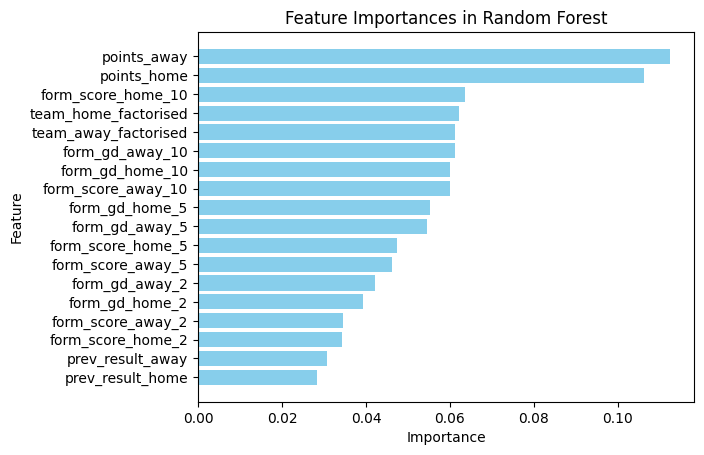

In [ ]:
rf_best_params = rf_results.sort_values('accuracy', ascending=False).iloc[0]

print(f"randomForestClassifier best parameters {rf_best_params}")

rf_best_params = rf_best_params.drop(['accuracy', 'f1', 'roc_auc'])

rf_best_params = rf_best_params.to_dict()

feature_names = RF_X_train.columns
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
#plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

<strong> XG Boost game prediction </strong>

In [ ]:
xgb_model = XGBClassifier(random_state=random_state)

# df = df[['team_a_score', 'team_h_score','form_score_home_10','form_score_away_10',
#         'form_score_home_5','form_score_away_5',
#         'form_score_home_2','form_score_away_2',
#         'team_home_factorised','team_away_factorised',
#         'form_gd_away_10','form_gd_home_10',
#         'form_gd_away_5','form_gd_home_5',
#         'form_gd_away_2','form_gd_home_2',
#         'prev_result_home','prev_result_away',
#         'points_home','points_away',
#         'result_num']]

XG_X_train = df_train[['form_score_home_10','form_score_away_10',
        'form_score_home_5','form_score_away_5',
        'form_score_home_2','form_score_away_2',
        'team_home_factorised','team_away_factorised',
        'form_gd_away_10','form_gd_home_10',
        'form_gd_away_5','form_gd_home_5',
        'form_gd_away_2','form_gd_home_2',
        'prev_result_home','prev_result_away',
        'points_home','points_away']]

XG_X_test = df_test[['form_score_home_10','form_score_away_10',
        'form_score_home_5','form_score_away_5',
        'form_score_home_2','form_score_away_2',
        'team_home_factorised','team_away_factorised',
        'form_gd_away_10','form_gd_home_10',
        'form_gd_away_5','form_gd_home_5',
        'form_gd_away_2','form_gd_home_2',
        'prev_result_home','prev_result_away',
        'points_home','points_away']]

label_encoder = LabelEncoder()

XG_Y_train,XG_Y_test = label_encoder.fit_transform(df_train[['result_num']]),label_encoder.fit_transform(df_test[['result_num']])

param_grid = {
    'n_estimators': [100, 175, 200],      
    'max_depth': [15, 30, 45],       
    'random_state': [random_state],
    'learning_rate': [0.01, 0.5, 0.1],        
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.75, 0.85]
}



xgb_results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'subsample', 'colsample_bytree', 'accuracy', 'f1', 'roc_auc'])

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    xgb_model.set_params(**params)
    
    xgb_model.fit(XG_X_train, XG_Y_train)
    
    XG_Y_pred = xgb_model.predict(XG_X_test)
    Y_proba = xgb_model.predict_proba(XG_X_test)
    
    accuracy = accuracy_score(XG_Y_test, XG_Y_pred)
    f1 = f1_score(XG_Y_test, XG_Y_pred, average='weighted')
    roc_auc = roc_auc_score(XG_Y_test, Y_proba, multi_class='ovr')
    
    xgb_results = pd.concat([xgb_results, pd.DataFrame([{
        'n_estimators': params['n_estimators'],
        'random_state': params['random_state'],
        'max_depth': params['max_depth'],
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc
    }])], ignore_index=True)

C:\Users\zicza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zicza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\1203627398.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  xgb_results = pd.concat([xgb_results, pd.DataFrame([{


Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.9}
Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 175, 'random_state': 42, 'subsample': 0.8}
Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 175, 'random_state': 42, 'subsample': 0.9}
Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}
Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.9}
Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}
Testing parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100, 'random_state': 42, 'su

XGBoost best parameters n_estimators             100
max_depth                 15
learning_rate            0.1
subsample                0.8
colsample_bytree        0.85
accuracy            0.409091
f1                  0.342438
roc_auc              0.53268
random_state            42.0
Name: 144, dtype: object


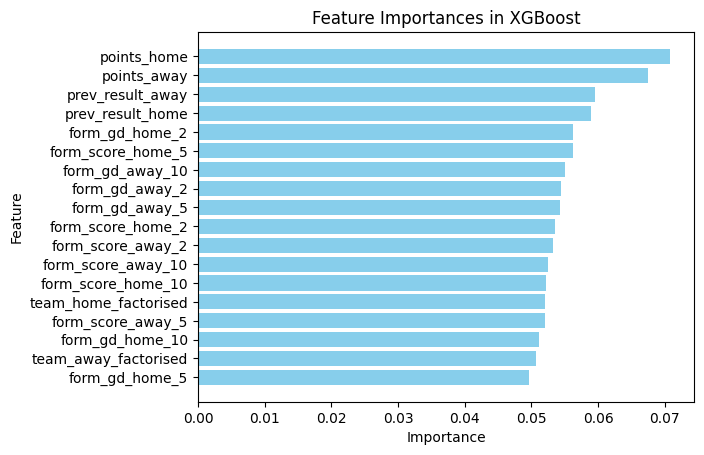

In [ ]:
xgb_best_params = xgb_results.sort_values('accuracy', ascending=False,).iloc[0]
print(f"XGBoost best parameters {xgb_best_params}")


#drop non-passable parameters
xgb_best_params = xgb_best_params.drop(['accuracy', 'f1', 'roc_auc', 'random_state'])
xgb_best_params = xgb_best_params.to_dict()

feature_names = XG_X_train.columns
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
xg_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.barh(xg_importance_df['Feature'], xg_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost')
plt.gca().invert_yaxis()
plt.show()

<strong>KNN Model classification </strong>

In [ ]:
X_train = XG_X_train.copy()
X_test = XG_X_test.copy()

In [ ]:
scaler = StandardScaler()

imputer = SimpleImputer(strategy='mean')

KNN_X_train =scaler.fit_transform(X_train)
KNN_X_test = scaler.transform(X_test)

KNN_Y_train,KNN_Y_test = df_train[['result_num']],df_test[['result_num']]

KNN_Y_train,KNN_Y_test = KNN_Y_train.squeeze(),KNN_Y_test.squeeze()

KNN_X_train = imputer.fit_transform(KNN_X_train)
KNN_X_test = imputer.transform(KNN_X_test)

neighbors = [8, 9, 10, 11, 12, 13]

knn_model_results = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'f1', 'roc_auc'])

for n in neighbors:
    print(f"Testing n_neighbors: {n}")
    knn_model = KNeighborsClassifier(n_neighbors=n)

    knn_model.fit(KNN_X_train, KNN_Y_train)

    KNN_Y_pred = knn_model.predict(KNN_X_test)
    Y_proba = knn_model.predict_proba(KNN_X_test)

    accuracy = accuracy_score(KNN_Y_test, KNN_Y_pred)
    f1 = f1_score(KNN_Y_test, KNN_Y_pred, average='weighted')
    roc_auc = roc_auc_score(KNN_Y_test, Y_proba, multi_class='ovr')

    knn_model_results = pd.concat([knn_model_results, pd.DataFrame([{
        'n_neighbors': n,
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc
    }])], ignore_index=True)

knn_best_params = knn_model_results.sort_values('accuracy', ascending=False).iloc[0]
print(f"KNN best parameters {knn_best_params}")

Testing n_neighbors: 8


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2276734161.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  knn_model_results = pd.concat([knn_model_results, pd.DataFrame([{


Testing n_neighbors: 9
Testing n_neighbors: 10
Testing n_neighbors: 11
Testing n_neighbors: 12
Testing n_neighbors: 13
KNN best parameters n_neighbors           9
accuracy        0.40404
f1             0.367321
roc_auc        0.541193
Name: 1, dtype: object


<strong> Model Comparison rf vs xgb

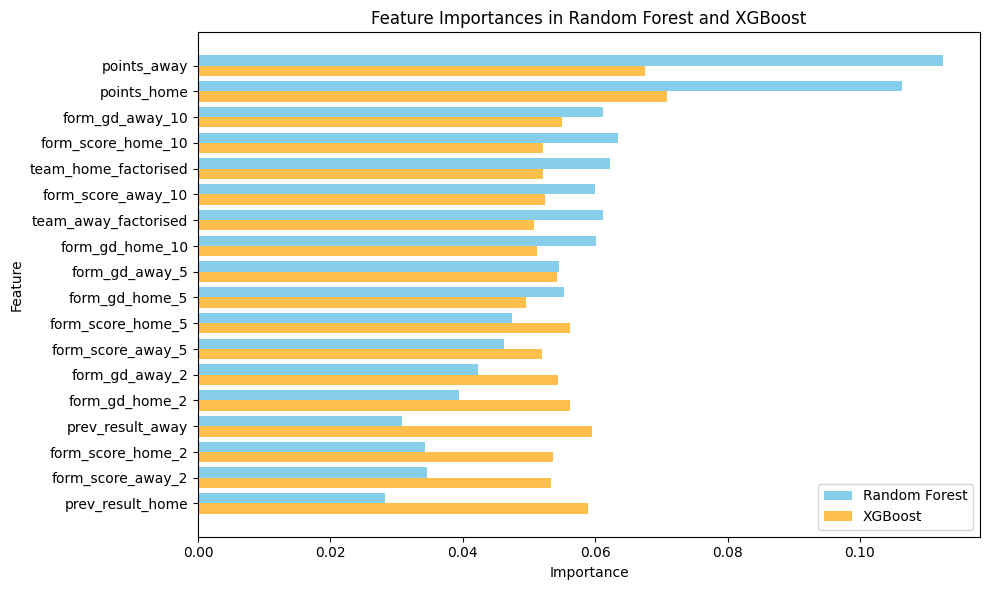

In [ ]:

merged_df = pd.merge(
    rf_importance_df,
    xg_importance_df,
    on="Feature",
    how="outer",
    suffixes=('_rf', '_xg')
).fillna(0)  # Fill NaN with 0 for missing features

# Sort features by their total importance across models
merged_df['Total_Importance'] = merged_df['Importance_rf'] + merged_df['Importance_xg']
merged_df = merged_df.sort_values(by='Total_Importance', ascending=False)

# Plot side-by-side bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
y_positions = range(len(merged_df))

# Plot Random Forest importances
plt.barh(
    [y - bar_width / 2 for y in y_positions],
    merged_df['Importance_rf'],
    height=bar_width,
    color='skyblue',
    label='Random Forest'
)

# Plot XGBoost importances
plt.barh(
    [y + bar_width / 2 for y in y_positions],
    merged_df['Importance_xg'],
    height=bar_width,
    color='orange',
    alpha=0.7,
    label='XGBoost'
)

# Formatting the chart
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest and XGBoost')
plt.yticks(y_positions, merged_df['Feature'])
plt.legend()
plt.gca().invert_yaxis()  # Display highest total importance at the top
plt.tight_layout()
plt.show()

In [ ]:
# Ensure the models are trained before making predictions
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(RF_X_train, RF_Y_train)

xgb_model = XGBClassifier(**xgb_best_params)
xgb_model.fit(XG_X_train, XG_Y_train)

knn_model = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors'])
knn_model.fit(KNN_X_train, KNN_Y_train)

df_test['rf_prediction'] = rf_model.predict(RF_X_test)
df_test['rf_confidence'] = rf_model.predict_proba(RF_X_test).max(axis=1)

df_test['xg_prediction'] = xgb_model.predict(XG_X_test)
df_test['xg_prediction'] = label_encoder.inverse_transform(df_test['xg_prediction'])
df_test['xg_confidence'] = xgb_model.predict_proba(XG_X_test).max(axis=1)

df_test['knn_prediction'] = knn_model.predict(KNN_X_test)
df_test['knn_confidence'] = knn_model.predict_proba(KNN_X_test).max(axis=1)

print(df_test.columns)

Index(['fixture', 'kickoff_time', 'team_a_score', 'team_h_score', 'was_home',
       'game_year', 'away_team', 'home_team', 'result',
       'points_from_last_game_away', 'points_from_last_game_home',
       'games_in_future', 'team_home_factorised', 'team_away_factorised',
       'form_score_home_10', 'form_score_away_10', 'form_score_home_5',
       'form_score_away_5', 'form_score_home_2', 'form_score_away_2',
       'goal_diff_home', 'goal_diff_away', 'form_gd_away_10',
       'form_gd_home_10', 'form_gd_away_5', 'form_gd_home_5', 'form_gd_away_2',
       'form_gd_home_2', 'prev_result_home', 'prev_result_away', 'points_home',
       'points_away', 'result_num', 'rf_prediction', 'rf_confidence',
       'xg_prediction', 'xg_confidence', 'knn_prediction', 'knn_confidence'],
      dtype='object')


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2118763553.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['rf_prediction'] = rf_model.predict(RF_X_test)
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2118763553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['rf_confidence'] = rf_model.predict_proba(RF_X_test).max(axis=1)
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2118763553.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
print(df_test[['home_team', 'away_team', 'kickoff_time']].dtypes)
print(df_fixture_data[['home_team', 'away_team', 'fixture_time']].dtypes)


df_test['kickoff_time'] = pd.to_datetime(df_test['kickoff_time'])
df_fixture_data['fixture_time'] = pd.to_datetime(
    df_fixture_data['fixture_time'], 
    format="%Y-%m-%dT%H:%M:%S.%f%z", 
    errors='coerce'
)
df_test['kickoff_time'] = pd.to_datetime(df_test['kickoff_time'], errors='coerce')


print(f"df_test {df_test[['home_team', 'away_team', 'kickoff_time']].dtypes}")
print(f"df_fixture_data {df_fixture_data[['home_team', 'away_team', 'fixture_time']].dtypes}")

df_2024_25_fixtures_and_results = pd.merge(
    df_fixture_data,
    df_test, 
    how='left', 
    right_on=['home_team', 'away_team'], 
    left_on=['home_team', 'away_team']
)


home_team                    object
away_team                    object
kickoff_time    datetime64[ns, UTC]
dtype: object
home_team               object
away_team               object
fixture_time    datetime64[ns]
dtype: object
df_test home_team                    object
away_team                    object
kickoff_time    datetime64[ns, UTC]
dtype: object
df_fixture_data home_team               object
away_team               object
fixture_time    datetime64[ns]
dtype: object


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2422979700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['kickoff_time'] = pd.to_datetime(df_test['kickoff_time'])
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\2422979700.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['kickoff_time'] = pd.to_datetime(df_test['kickoff_time'], errors='coerce')


<strong><span style= "color:orange;font-size:50px">Score prediction home and away</strong>

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from itertools import product

<span style = "color:orange;font-size:30px">rf socre build

In [ ]:
param_grid_rf_reg = {
    'estimator__n_estimators': [20, 50, 75],
    'estimator__max_depth': [20, 50],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__max_features': ['sqrt'],
    'estimator__bootstrap': [False,True],
    'estimator__random_state': [random_state]
}

parameter_combinations = list(product(
    param_grid_rf_reg['estimator__n_estimators'],
    param_grid_rf_reg['estimator__max_depth'],
    param_grid_rf_reg['estimator__min_samples_split'],
    param_grid_rf_reg['estimator__max_features'],
    param_grid_rf_reg['estimator__bootstrap'],
    param_grid_rf_reg['estimator__random_state']
))

# Convert combinations to a pandas DataFrame
parameters_to_test = pd.DataFrame(parameter_combinations, columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 
    'max_features', 'bootstrap', 'random_state'
])

# Drop duplicates if any (though unlikely here)
parameters_to_test = parameters_to_test.drop_duplicates().reset_index(drop=True)

# Prepare the training and test data
df_rf_reg_train = df[df["kickoff_time"] < comparison_date]
df_rf_reg_test  = df[df["kickoff_time"] > comparison_date]

df_rf_reg_train = df_rf_reg_train[['team_a_score', 'team_h_score',
                                   'form_score_home_10','form_score_away_10',
                                   'form_score_home_5','form_score_away_5',
                                   'form_score_home_2','form_score_away_2',
                                   'team_home_factorised','team_away_factorised',
                                   'form_gd_away_10','form_gd_home_10',
                                   'form_gd_away_5','form_gd_home_5',
                                   'form_gd_away_2','form_gd_home_2',
                                   'prev_result_home','prev_result_away',
                                   'points_home','points_away']]

df_rf_reg_test  = df_rf_reg_test[['team_a_score', 'team_h_score',
                                   'form_score_home_10','form_score_away_10',
                                   'form_score_home_5','form_score_away_5',
                                   'form_score_home_2','form_score_away_2',
                                   'team_home_factorised','team_away_factorised',
                                   'form_gd_away_10','form_gd_home_10',
                                   'form_gd_away_5','form_gd_home_5',
                                   'form_gd_away_2','form_gd_home_2',
                                   'prev_result_home','prev_result_away',
                                   'points_home','points_away']]

Y_rf_regression_train = df_rf_reg_train[['team_a_score', 'team_h_score']]
Y_rf_regression_test = df_rf_reg_test[['team_a_score', 'team_h_score']]
X_rf_regression_train = df_rf_reg_train.drop(columns=['team_a_score', 'team_h_score'])
X_rf_regression_test = df_rf_reg_test.drop(columns=['team_a_score', 'team_h_score'])

# Initialize the MultiOutput Regressor
MultiOutputmodel_rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Create a parameter grid
param_grid = list(ParameterGrid(param_grid_rf_reg))

# Prepare to store the results
results = pd.DataFrame(columns=['n_estimators', 'max_depth', 
                                'min_samples_split', 'max_features', 
                                'bootstrap','random_state',
                                'mae', 'mse', 'r2_score'])

# Loop over each parameter combination
for _, param_row in parameters_to_test.iterrows():
    # Convert the row to a dictionary
    params = param_row.to_dict()

    print(f"starting loop for {params}")

    # Set model parameters
    MultiOutputmodel_rf.set_params(estimator__n_estimators= int(params['n_estimators']),
                                estimator__max_depth= int(params['max_depth']),
                                estimator__min_samples_split= int(params['min_samples_split']),
                                estimator__max_features= params['max_features'],
                                estimator__bootstrap= params['bootstrap'],
                                estimator__random_state= int(params['random_state']))
    
    # Fit the model
    MultiOutputmodel_rf.fit(X_rf_regression_train, Y_rf_regression_train)
    
    # Get predictions from the model
    Y_pred = MultiOutputmodel_rf.predict(X_rf_regression_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(Y_rf_regression_test, Y_pred)
    mse_score = mean_squared_error(Y_rf_regression_test, Y_pred)
    r2 = r2_score(Y_rf_regression_test, Y_pred)
    
    # Store the results in the dataframe as a new row
    results = pd.concat([results, pd.DataFrame([{
        'n_estimators': [params['n_estimators']],
        'max_depth': [params['max_depth']],
        'min_samples_split': [params['min_samples_split']],
        'max_features': [params['max_features']],
        'bootstrap': [params['bootstrap']],
        'random_state': [params['random_state']],
        'mae': mae,
        'mse': mse_score,
        'r2_score': r2
    }], columns=results.columns)], ignore_index=True)

# Display the results
print("Grid Search Results:")
print(results)


starting loop for {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 42}


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4259450588.py:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{


starting loop for {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 2, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 42}
starting loop for {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 42}
starting loop for {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 5, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 42}
starting loop for {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 42}
starting loop for {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 42}
starting loop for {'n_estimators': 20, 'max_depth': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 42}
starting loop for {'n_estimators': 20, 'max_depth': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'bootstrap': True, 'random_state'

In [ ]:
# Get the best parameters
best_params = results.sort_values(by=['r2_score'],ascending=False ).iloc[0]
print(f"Best parameters: {best_params}")

Best parameters: n_estimators             [75]
max_depth                [20]
min_samples_split        [10]
max_features           [sqrt]
bootstrap             [False]
random_state             [42]
mae                  1.075546
mse                  1.784382
r2_score            -0.027996
Name: 28, dtype: object


n_estimators             [75]
max_depth                [20]
min_samples_split        [10]
max_features           [sqrt]
bootstrap             [False]
random_state             [42]
mae                  1.075546
mse                  1.784382
r2_score            -0.027996
Name: 28, dtype: object
object


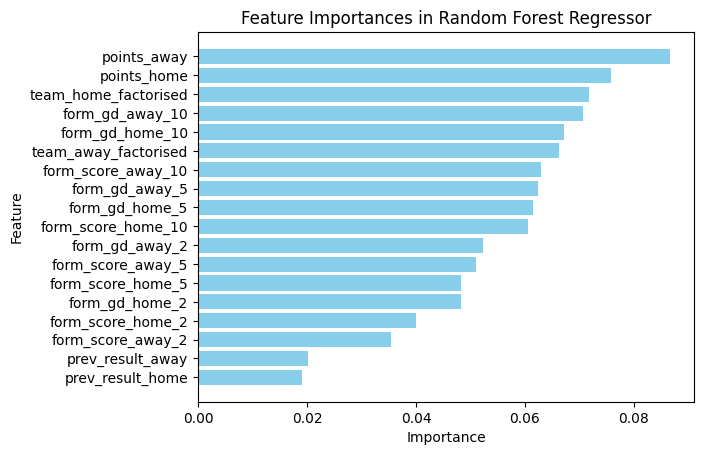

In [ ]:
print(best_params)

print(best_params.dtype)

best_params = best_params.drop(['mae', 'mse', 'r2_score'])

# Ensure the 'max_features' is one of the valid values
if best_params['max_features'] not in ['sqrt', 'log2', None] and not isinstance(best_params['max_features'], (int, float)):
    # If it's invalid, set a default valid value (e.g., 'sqrt' or 0.5)
    best_params['max_features'] = 'sqrt'

# Ensure that the rest of the parameters are in the correct format
best_params['bootstrap'] = bool(best_params['bootstrap'])
if isinstance(best_params['min_samples_split'], list):    
    best_params['min_samples_split'] = best_params['min_samples_split'][0]
if isinstance(best_params['max_depth'], list):
    best_params['max_depth'] = best_params['max_depth'][0]
if isinstance(best_params['n_estimators'], list):
    best_params['n_estimators'] = best_params['n_estimators'][0]
if isinstance(best_params['random_state'], list):
    best_params['random_state'] = best_params['random_state'][0]

best_model_rf_reg = MultiOutputRegressor(RandomForestRegressor(**best_params.to_dict()))
best_model_rf_reg.fit(X_rf_regression_train, Y_rf_regression_train)

feature_importances  = best_model_rf_reg.estimators_[0].feature_importances_

feature_names = X_rf_regression_train.columns

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

plt.barh(importances['Feature'], importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.show()



In [ ]:
# Make predictions
predictions = best_model_rf_reg.predict(X_rf_regression_test)

# Assign predictions to the DataFrame
df_rf_reg_test['home_score_prediction'] = predictions[:, 1]  # Predictions for the home team
df_rf_reg_test['away_score_prediction'] = predictions[:, 0]  # Predictions for the away team

df_rf_reg_test['home_score_prediction_rounded'] = df_rf_reg_test['home_score_prediction'].round(0).astype(int)
df_rf_reg_test['away_score_prediction_rounded'] = df_rf_reg_test['away_score_prediction'].round(0).astype(int)

# Print the results
df_reg_check = df_rf_reg_test[['team_h_score', 'team_a_score', 'home_score_prediction', 'away_score_prediction','home_score_prediction_rounded','away_score_prediction_rounded']]

XBoost regressional build

In [ ]:
param_grid_xg_reg = {
    'learning_rate': [0.01, 0.5, 0.1],
    'max_depth': [3,10, 50],
    'min_child_weight': [3, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'booster': ['gbtree', 'dart'],
    'tree_method': ['hist']
}

# Generate parameter combinations
parameter_combinations = list(product(
    param_grid_xg_reg['learning_rate'],
    param_grid_xg_reg['max_depth'],
    param_grid_xg_reg['min_child_weight'],
    param_grid_xg_reg['subsample'],
    param_grid_xg_reg['colsample_bytree'],
    # param_grid_xg_reg['gamma'],
    # param_grid_xg_reg['reg_alpha'],
    param_grid_xg_reg['booster'],
    param_grid_xg_reg['tree_method']
))

parameters_to_test = pd.DataFrame(parameter_combinations, columns=[
    'learning_rate', 'max_depth', 'min_child_weight', 'subsample',
    'colsample_bytree', 'booster', 'tree_method'
])

# Drop duplicates if any
parameters_to_test = parameters_to_test.drop_duplicates().reset_index(drop=True)

# Split your data (replace `comparison_date` with your actual date)
df_rf_reg_train = df[df["kickoff_time"] < comparison_date]
df_rf_reg_test = df[df["kickoff_time"] > comparison_date]

df_rf_reg_train = df_rf_reg_train[['team_a_score', 'team_h_score',
                                   'form_score_home_10','form_score_away_10',
                                   'form_score_home_5','form_score_away_5',
                                   'form_score_home_2','form_score_away_2',
                                   'team_home_factorised','team_away_factorised',
                                   'form_gd_away_10','form_gd_home_10',
                                   'form_gd_away_5','form_gd_home_5',
                                   'form_gd_away_2','form_gd_home_2',
                                   'prev_result_home','prev_result_away',
                                   'points_home','points_away']]

df_rf_reg_test  = df_rf_reg_test[['team_a_score', 'team_h_score',
                                   'form_score_home_10','form_score_away_10',
                                   'form_score_home_5','form_score_away_5',
                                   'form_score_home_2','form_score_away_2',
                                   'team_home_factorised','team_away_factorised',
                                   'form_gd_away_10','form_gd_home_10',
                                   'form_gd_away_5','form_gd_home_5',
                                   'form_gd_away_2','form_gd_home_2',
                                   'prev_result_home','prev_result_away',
                                   'points_home','points_away']]

# Prepare your feature and target data
X_xg_regression_train = df_rf_reg_train.drop(columns=['team_a_score', 'team_h_score'])
X_xg_regression_test = df_rf_reg_test.drop(columns=['team_a_score', 'team_h_score'])
Y_xg_regression_train = df_rf_reg_train[['team_a_score', 'team_h_score']]
Y_xg_regression_test = df_rf_reg_test[['team_a_score', 'team_h_score']]

# Initialize the MultiOutput Regressor with XGBRegressor
MultiOutputmodel_xg = MultiOutputRegressor(XGBRegressor(random_state=42))

# Prepare to store results
results_xg_reg = pd.DataFrame(columns=['learning_rate','max_depth','min_child_weight','subsample',
                                       'colsample_bytree','gamma','reg_alpha',
                                       'booster','tree_method','mae','mse','r2_score'])

# Loop through each parameter combination
for _, param_row in parameters_to_test.iterrows():
    params = param_row.to_dict()
    print(f"starting loop for {params}")

    # Set model parameters
    xgb_model = XGBRegressor(
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        # gamma=params['gamma'],
        # reg_alpha=params['reg_alpha'],
        booster=params['booster'],
        tree_method=params['tree_method']
    )

    MultiOutputmodel_xg = MultiOutputRegressor(xgb_model)

    # Fit the model
    MultiOutputmodel_xg.fit(X_xg_regression_train, Y_xg_regression_train)

    # Get predictions
    Y_pred = MultiOutputmodel_xg.predict(X_xg_regression_test)

    # Calculate metrics
    mae = mean_absolute_error(Y_xg_regression_test, Y_pred)
    mse_score = mean_squared_error(Y_xg_regression_test, Y_pred)
    r2 = r2_score(Y_xg_regression_test, Y_pred)

    # Store results in the dataframe
    results_xg_reg = pd.concat([results_xg_reg, pd.DataFrame([{
        'learning_rate': params['learning_rate'],
        'max_depth': params['max_depth'],
        'min_child_weight': params['min_child_weight'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        # 'gamma': params['gamma'],
        # 'reg_alpha': params['reg_alpha'],
        'booster': params['booster'],
        'tree_method': params['tree_method'],
        'mae': mae,
        'mse': mse_score,
        'r2_score': r2
    }], columns=results_xg_reg.columns)], ignore_index=True)

# Display the results
print("Grid Search Results:")
print(results_xg_reg)

starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'booster': 'gbtree', 'tree_method': 'hist'}


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\3377588144.py:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_xg_reg = pd.concat([results_xg_reg, pd.DataFrame([{


starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'booster': 'dart', 'tree_method': 'hist'}
starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.8, 'booster': 'gbtree', 'tree_method': 'hist'}
starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.8, 'booster': 'dart', 'tree_method': 'hist'}
starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.9, 'booster': 'gbtree', 'tree_method': 'hist'}
starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.9, 'booster': 'dart', 'tree_method': 'hist'}
starting loop for {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.7, 'booster': 'gbtree', 'tree_method': 'hist'

learning_rate            0.1
max_depth                  3
min_child_weight           7
subsample                0.8
colsample_bytree         0.8
gamma                    NaN
reg_alpha                NaN
booster                 dart
tree_method             hist
mae                 1.060244
mse                 1.771171
r2_score           -0.008089
Name: 351, dtype: object
learning_rate        0.1
max_depth              3
min_child_weight       7
subsample            0.8
colsample_bytree     0.8
gamma                NaN
reg_alpha            NaN
booster             dart
tree_method         hist
Name: 351, dtype: object


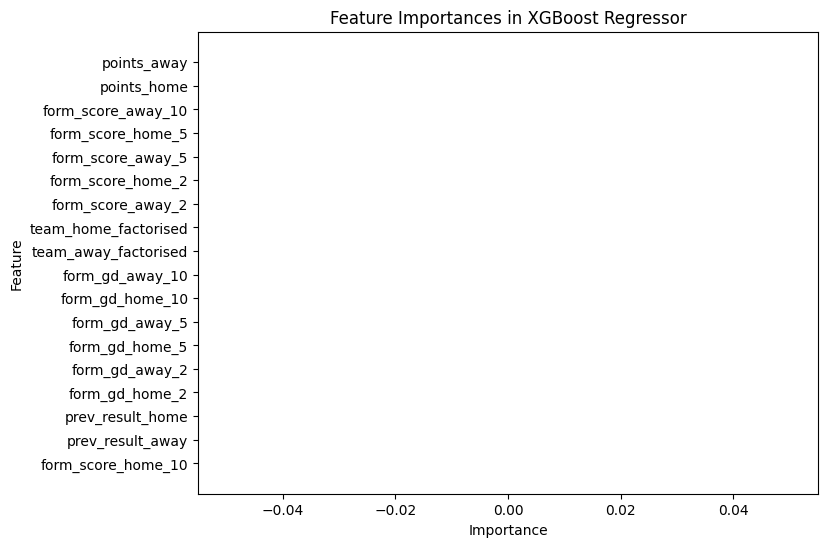

In [ ]:
best_xgb_result = results_xg_reg.sort_values(by=['r2_score'],ascending=False ).iloc[0]
print(best_xgb_result)

best_xgb_params = best_xgb_result.drop(['mae', 'mse', 'r2_score'])

print(best_xgb_params)


best_xgb = XGBRegressor(**best_xgb_params)
best_xgb = MultiOutputRegressor(best_xgb)

# Fit the model
best_xgb.fit(X_xg_regression_train, Y_xg_regression_train)

# Aggregate feature importances
feature_importances = np.mean(
    [est.feature_importances_ for est in best_xgb.estimators_],
    axis=0
)

# Create a DataFrame with feature importances
importances_xgb = pd.DataFrame({
    'Feature': X_xg_regression_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importances_xgb['Feature'], importances_xgb['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost Regressor')
plt.show()


In [ ]:
today = pd.to_datetime('today', format='ISO8601', utc=True)

df_reg['kickoff_time'] = pd.to_datetime(df_reg['kickoff_time'], format='ISO8601', utc=True)

df_predictions = df_reg[(df_reg["games_in_future"] == True) & (df_reg["form_gd_away_10"].notnull())]

print(today)

print(df_predictions.columns)
print(df_predictions)

columns_for_prediction = ['form_score_home_10','form_score_away_10',
                        'form_score_home_5','form_score_away_5',
                        'form_score_home_2','form_score_away_2',
                        'team_home_factorised','team_away_factorised',
                        'form_gd_away_10','form_gd_home_10',
                        'form_gd_away_5','form_gd_home_5',
                        'form_gd_away_2','form_gd_home_2',
                        'prev_result_home','prev_result_away',
                        'points_home','points_away']

xgb_model = XGBClassifier(**xgb_best_params)
xgb_model = xgb_model.fit(XG_X_train, XG_Y_train)

df_predictions["form_score_home_10"] = df_predictions["form_score_home_10"].astype(float)

#output predictions on data in the future
#game result classification
df_predictions["game_result_prediction_rf"] = rf_model.predict(df_predictions[columns_for_prediction])
df_predictions["game_result_prediction_rf"] = df_predictions["game_result_prediction_rf"].map({1: 'Home Win', 0:'Draw',  -1:'Away Win'})
df_predictions["game_result_prediction_xg"] = xgb_model.predict(df_predictions[columns_for_prediction])
df_predictions["game_result_prediction_xg"] = label_encoder.inverse_transform(df_predictions["game_result_prediction_xg"])
df_predictions["game_result_prediction_xg"] = df_predictions["game_result_prediction_xg"].map({1: 'Home Win', 0:'Draw',  -1:'Away Win'})

#score output predictions RF
df_predictions["home_goals_rf_reg"] = best_model_rf_reg.predict(df_predictions[columns_for_prediction])[:,1]
df_predictions["away_goals_rf_reg"] = best_model_rf_reg.predict(df_predictions[columns_for_prediction])[:,0]
df_predictions["home_goals_rf_reg"] = df_predictions["home_goals_rf_reg"].round(0).astype(int)
df_predictions["away_goals_rf_reg"] = df_predictions["away_goals_rf_reg"].round(0).astype(int)

#score output predictions XG
df_predictions["home_goals_xg_reg"] = best_xgb.predict(df_predictions[columns_for_prediction])[:,1]
df_predictions["away_goals_xg_reg"] = best_xgb.predict(df_predictions[columns_for_prediction])[:,0]
df_predictions["home_goals_xg_reg"] = df_predictions["home_goals_xg_reg"].round(0).astype(int)
df_predictions["away_goals_xg_reg"] = df_predictions["away_goals_xg_reg"].round(0).astype(int)

print(df_predictions.columns)


df_prediction_output = df_predictions[['home_team', 'away_team', 'kickoff_time',
                                        'game_result_prediction_rf','game_result_prediction_xg',
                                        'home_goals_rf_reg','away_goals_rf_reg',
                                        'home_goals_xg_reg','away_goals_xg_reg']]

2025-02-10 12:28:02.260474+00:00
Index(['fixture', 'kickoff_time', 'team_a_score', 'team_h_score', 'was_home',
       'game_year', 'away_team', 'home_team', 'result',
       'points_from_last_game_away', 'points_from_last_game_home',
       'games_in_future', 'team_home_factorised', 'team_away_factorised',
       'form_score_home_10', 'form_score_away_10', 'form_score_home_5',
       'form_score_away_5', 'form_score_home_2', 'form_score_away_2',
       'goal_diff_home', 'goal_diff_away', 'form_gd_away_10',
       'form_gd_home_10', 'form_gd_away_5', 'form_gd_home_5', 'form_gd_away_2',
       'form_gd_home_2', 'prev_result_home', 'prev_result_away', 'points_home',
       'points_away', 'result_num'],
      dtype='object')
     fixture              kickoff_time  team_a_score  team_h_score was_home  \
238      NaN 2025-02-03 20:00:00+00:00           NaN           NaN      NaN   
239      NaN 2025-02-12 19:30:00+00:00           NaN           NaN      NaN   
240      NaN 2025-02-14 20:00:00

C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4196869506.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions["form_score_home_10"] = df_predictions["form_score_home_10"].astype(float)
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4196869506.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions["game_result_prediction_rf"] = rf_model.predict(df_predictions[columns_for_prediction])
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4196869506.py:30: SettingWithCopyWarning:

Index(['fixture', 'kickoff_time', 'team_a_score', 'team_h_score', 'was_home',
       'game_year', 'away_team', 'home_team', 'result',
       'points_from_last_game_away', 'points_from_last_game_home',
       'games_in_future', 'team_home_factorised', 'team_away_factorised',
       'form_score_home_10', 'form_score_away_10', 'form_score_home_5',
       'form_score_away_5', 'form_score_home_2', 'form_score_away_2',
       'goal_diff_home', 'goal_diff_away', 'form_gd_away_10',
       'form_gd_home_10', 'form_gd_away_5', 'form_gd_home_5', 'form_gd_away_2',
       'form_gd_home_2', 'prev_result_home', 'prev_result_away', 'points_home',
       'points_away', 'result_num', 'game_result_prediction_rf',
       'game_result_prediction_xg', 'home_goals_rf_reg', 'away_goals_rf_reg',
       'home_goals_xg_reg', 'away_goals_xg_reg'],
      dtype='object')


C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4196869506.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions["away_goals_rf_reg"] = best_model_rf_reg.predict(df_predictions[columns_for_prediction])[:,0]
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4196869506.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions["home_goals_rf_reg"] = df_predictions["home_goals_rf_reg"].round(0).astype(int)
C:\Users\zicza\AppData\Local\Temp\ipykernel_29004\4196869506.py:39: SettingWithC

<strong><span style="color:orange;font-size:25px"> claissifcation using df_home and away results

In [ ]:
print(df_home_vs_away.columns)

columns_to_keep  = ["home_team", "away_team", "result", "kickoff_time", "games_in_future",
       "team_a_score_y", "team_h_score_y","was_home_x", "win_loss_away", "goal_diff_away",
       "last_2_games_win_raito_away", "last_5_games_win_raito_away","last_10_games_win_raito_away"
       "last_2_games_goal_diff_home", "last_5_games_goal_diff_away","last_10_games_goal_diff_away"]

df_home_vs_away = df_home_vs_away[columns_to_keep]

print(df_home_vs_away.columns)

Index(['home_team', 'away_team', 'result', 'kickoff_time', 'games_in_future',
       'team_a_score_y', 'team_h_score_y', 'was_home_x', 'game_year_x',
       'win_loss_away', 'goal_diff_away', 'last_2_games_win_raito_away',
       'last_5_games_win_raito_away', 'last_10_games_win_raito_away',
       'last_2_games_goal_diff_away', 'last_5_games_goal_diff_away',
       'last_10_games_goal_diff_away', 'fixture_y', 'team_a_score',
       'team_h_score', 'was_home_y', 'game_year_y', 'win_loss_y',
       'goal_diff_y', 'last_2_games_win_raito_y', 'last_5_games_win_raito_y',
       'last_10_games_win_raito_y', 'last_2_games_goal_diff_y',
       'last_5_games_goal_diff_y', 'last_10_games_goal_diff_y'],
      dtype='object')


KeyError: "['last_10_games_win_raito_awaylast_2_games_goal_diff_away'] not in index"